#### 2. Do the Eda on this Dataset :Presidential Election Polls 2024 Dataset and extract useful information from this: 
Dataset Description: 
This dataset comprises the results of a nationwide presidential election poll conducted on March 4, 2024. The 
data offers various insights but does not align with the official election results. You are encouraged to create 
your notebooks and delve into the data for further exploration. 

In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [128]:
df = pd.read_csv('election2024.csv')

In [129]:
df.head()

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
0,07169ed8148ce047,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,NaN,farming,1.445172
1,0716a4f3354cecdd,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,commercial organization,trade,1.445172
2,0716889b304ce79c,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,law enforcement agency,law enforcement agency,1.301691
3,07168e28b5cce563,male,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,NaN,NaN,1.538628
4,0716a563914ce549,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,commercial organization,"tech, programming, communications",1.967015


In [130]:
df.shape

(1600, 16)

In [131]:
df.columns

Index(['id', 'sex', 'age', 'federal_district', 'type_of_city',
       'knows_election_date', 'will_vote', 'candidate', 'television_usage',
       'internet_usage', 'education', 'income', 'employment', 'job_type',
       'company_type', 'weight1'],
      dtype='object')

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1600 non-null   object 
 1   sex                  1600 non-null   object 
 2   age                  1600 non-null   float64
 3   federal_district     1600 non-null   object 
 4   type_of_city         1600 non-null   object 
 5   knows_election_date  1600 non-null   object 
 6   will_vote            1600 non-null   object 
 7   candidate            1600 non-null   object 
 8   television_usage     1600 non-null   object 
 9   internet_usage       1600 non-null   object 
 10  education            1600 non-null   object 
 11  income               1600 non-null   object 
 12  employment           1600 non-null   object 
 13  job_type             692 non-null    object 
 14  company_type         879 non-null    object 
 15  weight1              1600 non-null   f

In [133]:
df.isnull().sum()

id                       0
sex                      0
age                      0
federal_district         0
type_of_city             0
knows_election_date      0
will_vote                0
candidate                0
television_usage         0
internet_usage           0
education                0
income                   0
employment               0
job_type               908
company_type           721
weight1                  0
dtype: int64

In [134]:
df.duplicated().sum()

0

In [135]:
df.describe()

,age,weight1
count,1600.000000,1600.000000
mean,49.936250,1.000000
std,16.901797,0.327084
min,18.000000,0.468226
25%,37.000000,0.772224
50%,49.000000,0.921724
75%,64.000000,1.158913
max,90.000000,2.515072


In [136]:
df.drop('id', axis=1, inplace=True)

In [137]:
df.head()

,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
0,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,NaN,farming,1.445172
1,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,commercial organization,trade,1.445172
2,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,law enforcement agency,law enforcement agency,1.301691
3,male,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,NaN,NaN,1.538628
4,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,commercial organization,"tech, programming, communications",1.967015


In [138]:
df.dtypes

sex                     object
age                    float64
federal_district        object
type_of_city            object
knows_election_date     object
will_vote               object
candidate               object
television_usage        object
internet_usage          object
education               object
income                  object
employment              object
job_type                object
company_type            object
weight1                float64
dtype: object

In [139]:
temp = df[['employment', 'job_type', 'company_type']]
temp

,employment,job_type,company_type
0,entrepreneur,NaN,farming
1,work for hire,commercial organization,trade
2,work for hire,law enforcement agency,law enforcement agency
3,unemployed,NaN,NaN
4,employed student,commercial organization,"tech, programming, communications"
...,...,...,...
1595,unemployed pensioner,NaN,NaN
1596,unemployed pensioner,NaN,NaN
1597,unemployed pensioner,NaN,NaN
1598,employed pensioner,commercial organization,"industry, manufacturing"


In [140]:
temp[(df['job_type'].isnull()) & (df['company_type'].isnull())]

,employment,job_type,company_type
3,unemployed,NaN,NaN
8,unemployed pensioner,NaN,NaN
13,unemployed student,NaN,NaN
14,unemployed,NaN,NaN
16,unemployed pensioner,NaN,NaN
...,...,...,...
1594,unemployed,NaN,NaN
1595,unemployed pensioner,NaN,NaN
1596,unemployed pensioner,NaN,NaN
1597,unemployed pensioner,NaN,NaN


In [141]:
temp[(df['job_type'].isnull()) & (df['company_type'].isnull())]['employment'].value_counts()

unemployed pensioner    502
unemployed              101
parental leave           44
unemployed student       27
hard to say              22
refused to answer         3
Name: employment, dtype: int64

In [142]:
idx = df[(df['job_type'].isnull()) & (df['company_type'].isnull())].index
idx

Int64Index([   3,    8,   13,   14,   16,   17,   18,   20,   21,   23,
            ...
            1582, 1589, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1599],
           dtype='int64', length=699)

In [143]:
df.loc[idx, 'job_type'] = 'N/A'

In [144]:
df.loc[idx, 'company_type'] = 'N/A'

In [145]:
df[(df['job_type'].isnull()) & (df['company_type'].isnull())]

,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1


In [146]:
df.isnull().sum()

sex                      0
age                      0
federal_district         0
type_of_city             0
knows_election_date      0
will_vote                0
candidate                0
television_usage         0
internet_usage           0
education                0
income                   0
employment               0
job_type               209
company_type            22
weight1                  0
dtype: int64

In [147]:
temp[(df['job_type'].isnull()) | (df['company_type'].isnull())]

,employment,job_type,company_type
0,entrepreneur,NaN,farming
7,self-employed,NaN,other
9,entrepreneur,NaN,housing and communal services
10,entrepreneur,NaN,finances
30,self-employed,NaN,farming
...,...,...,...
1468,self-employed,NaN,trade
1487,entrepreneur,NaN,trade
1491,entrepreneur,NaN,other
1508,self-employed,NaN,other


In [148]:
df = df.fillna('N/A')

In [149]:
df.isnull().sum()

sex                    0
age                    0
federal_district       0
type_of_city           0
knows_election_date    0
will_vote              0
candidate              0
television_usage       0
internet_usage         0
education              0
income                 0
employment             0
job_type               0
company_type           0
weight1                0
dtype: int64

In [150]:
df.sample(10)

,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
1235,male,45.0,central,city with population of 1 million and higher,named correct date,definitely yes,Putin,less than 4 hours a day,less than 4 hours a day,college,medium,work for hire,commercial organization,"Сфера услуг, сервиса, бытового обслуживания Вк...",0.789598
1486,male,39.0,siberian,village,not sure or no answer,definitely no,Putin,less than 4 hours a day,several times a week,incomplete school education,low,unemployed,N/A,N/A,0.834845
421,female,85.0,central,city with population of 1 million and higher,named correct date,definitely yes,Putin,over 4 hours a day,less than 4 hours a day,bachelor degree,high,unemployed pensioner,N/A,N/A,1.256494
1363,male,52.0,northwestern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,medium,entrepreneur,N/A,"tech, programming, communications",1.579765
221,female,45.0,far eastern,settlement,named correct date,definitely yes,Putin,over 4 hours a day,less than 4 hours a day,bachelor degree,high,unemployed,N/A,N/A,1.411843
881,male,54.0,southern,city with population of 500-950k,not sure or no answer,definitely yes,Putin,less than 4 hours a day,less than 4 hours a day,college,medium,work for hire,government agency,housing and communal services,0.559132
406,male,84.0,central,village,named correct date,likely yes,Putin,over 4 hours a day,does not use internet,college,high,unemployed pensioner,N/A,N/A,0.895137
1164,female,60.0,siberian,village,named correct date,definitely yes,Putin,several times a week,less than 4 hours a day,bachelor degree,medium,employed pensioner,"government, management, judicial bodies",state administration,1.079842
1418,male,56.0,central,city with population of 1 million and higher,named correct date,not sure,struggle to answer,several times a week,several times a week,bachelor degree,low,work for hire,government agency,farming,1.126382
1378,female,83.0,ural,city with population of 100-500k,named correct date,not sure,Putin,over 4 hours a day,does not use internet,college,medium,unemployed pensioner,N/A,N/A,0.607629


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sex                  1600 non-null   object 
 1   age                  1600 non-null   float64
 2   federal_district     1600 non-null   object 
 3   type_of_city         1600 non-null   object 
 4   knows_election_date  1600 non-null   object 
 5   will_vote            1600 non-null   object 
 6   candidate            1600 non-null   object 
 7   television_usage     1600 non-null   object 
 8   internet_usage       1600 non-null   object 
 9   education            1600 non-null   object 
 10  income               1600 non-null   object 
 11  employment           1600 non-null   object 
 12  job_type             1600 non-null   object 
 13  company_type         1600 non-null   object 
 14  weight1              1600 non-null   float64
dtypes: float64(2), object(13)
memory usage

In [152]:
cat_columns = [col for col in df.columns if df[col].dtype == 'O']
cat_columns

['sex',
 'federal_district',
 'type_of_city',
 'knows_election_date',
 'will_vote',
 'candidate',
 'television_usage',
 'internet_usage',
 'education',
 'income',
 'employment',
 'job_type',
 'company_type']

In [153]:
df['company_type'].unique()

array(['farming', 'trade', 'law enforcement agency', 'N/A',
       'tech, programming, communications', 'refused to answer',
       'industry, manufacturing', 'other',
       'housing and communal services', 'finances', 'education',
       'healthcare', 'state administration', 'culture, sports',
       'transportation, storage',
       'Сфера услуг, сервиса, бытового обслуживания Включает в том числе: Прачечная/химчистка, ремонт мебели, часов, ювелирны...',
       'catering, restaurants', 'construction, architecture',
       'hard to say', 'entertainment, tourism', 'social services',
       'media'], dtype=object)

In [154]:
df[df['company_type'].str.contains('Сфера услуг')]

,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
42,male,37.0,southern,city with population of 1 million and higher,named correct year,likely no,will not take part,does not watch,less than 4 hours a day,bachelor degree,very high,entrepreneur,N/A,"Сфера услуг, сервиса, бытового обслуживания Вк...",1.075930
60,male,20.0,southern,city with population of 100-500k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,incomplete school education,high,work for hire,hard to say,"Сфера услуг, сервиса, бытового обслуживания Вк...",0.978454
94,male,37.0,central,city with population of 100-500k,named correct date,definitely yes,Davankov,less than 4 hours a day,over 4 hours a day,college,high,entrepreneur,N/A,"Сфера услуг, сервиса, бытового обслуживания Вк...",0.550920
102,male,44.0,volga,city with population of 1 million and higher,named correct date,not sure,Putin,over 4 hours a day,over 4 hours a day,college,high,work for hire,commercial organization,"Сфера услуг, сервиса, бытового обслуживания Вк...",0.788470
120,female,18.0,central,city with population of 500-950k,not sure or no answer,not sure,struggle to answer,does not watch,over 4 hours a day,college,high,self-employed,N/A,"Сфера услуг, сервиса, бытового обслуживания Вк...",0.833791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434,male,39.0,ural,city with population of less than 50k,named correct date,not sure,Putin,several times a week,over 4 hours a day,college,low,work for hire,commercial organization,"Сфера услуг, сервиса, бытового обслуживания Вк...",0.664972
1460,male,46.0,volga,city with population of 500-950k,not sure or no answer,not sure,Putin,less than 4 hours a day,once half a year,incomplete school education,low,self-employed,N/A,"Сфера услуг, сервиса, бытового обслуживания Вк...",0.601133
1464,female,46.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Davankov,less than 4 hours a day,less than 4 hours a day,bachelor degree,low,self-employed,N/A,"Сфера услуг, сервиса, бытового обслуживания Вк...",1.482096
1484,female,56.0,ural,city with population of 100-500k,named correct date,definitely yes,spoilt vote,does not watch,less than 4 hours a day,academic degree,low,employed pensioner,commercial organization,"Сфера услуг, сервиса, бытового обслуживания Вк...",1.267175


In [155]:
df.loc[df['company_type'].str.contains('Сфера услуг'), 'company_type'] = 'Comprehensive Consumer Services'

In [165]:
for i in cat_columns:
    print(f"Unique value in '{i}' column: {df[i].unique()}")
    print('---'*30)

Unique value in 'sex' column: ['male' 'female']
------------------------------------------------------------------------------------------
Unique value in 'federal_district' column: ['north caucasian' 'volga' 'northwestern' 'southern' 'central' 'ural'
 'siberian' 'far eastern']
------------------------------------------------------------------------------------------
Unique value in 'type_of_city' column: ['village' 'city with population of less than 50k'
 'city with population of 1 million and higher'
 'city with population of 50-100k' 'city with population of 100-500k'
 'settlement' 'city with population of 500-950k']
------------------------------------------------------------------------------------------
Unique value in 'knows_election_date' column: ['named correct date' 'not sure or no answer' 'wrong answer'
 'named correct year']
------------------------------------------------------------------------------------------
Unique value in 'will_vote' column: ['not sure' 'definitely 

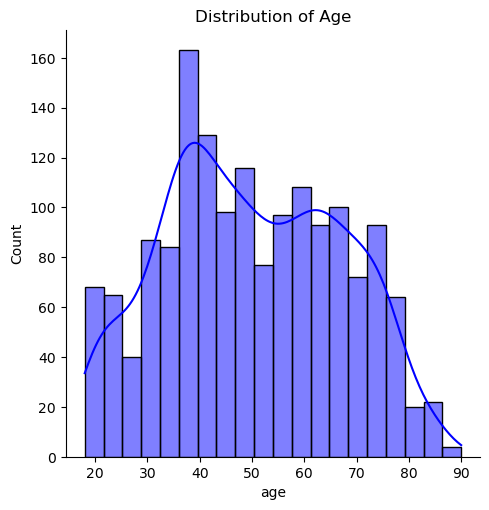

In [174]:
sns.displot(df['age'], kde=True, bins=20, color='blue')
plt.title('Distribution of Age')
plt.show()

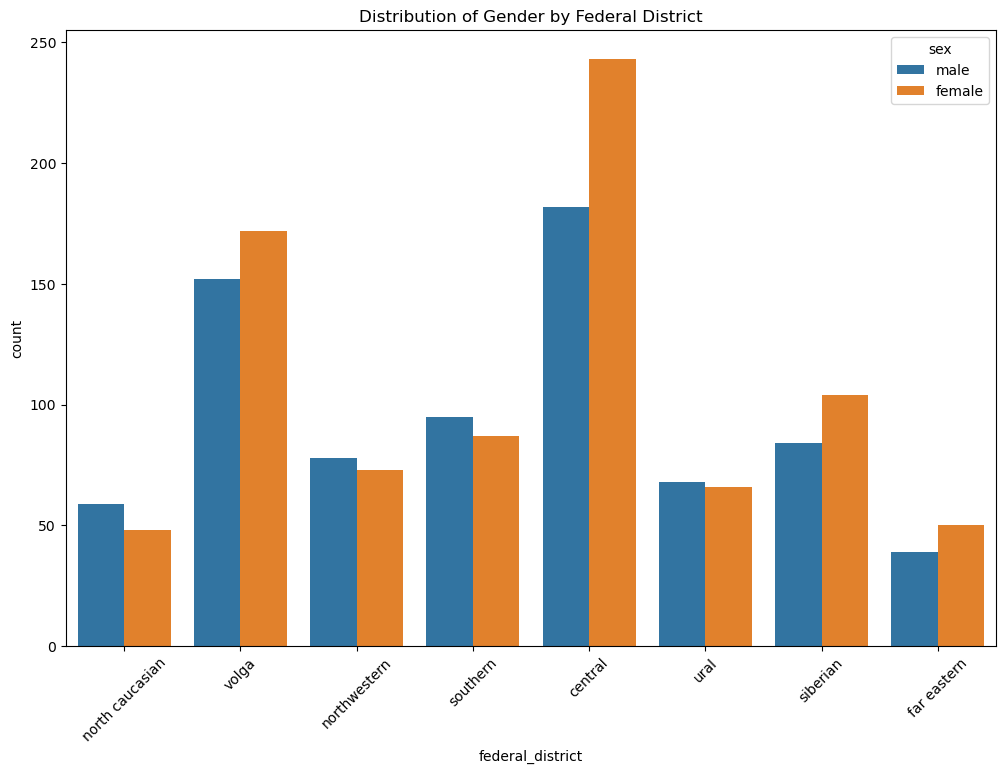

In [175]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='federal_district', hue='sex')
plt.title('Distribution of Gender by Federal District')
plt.xticks(rotation=45)
plt.show()

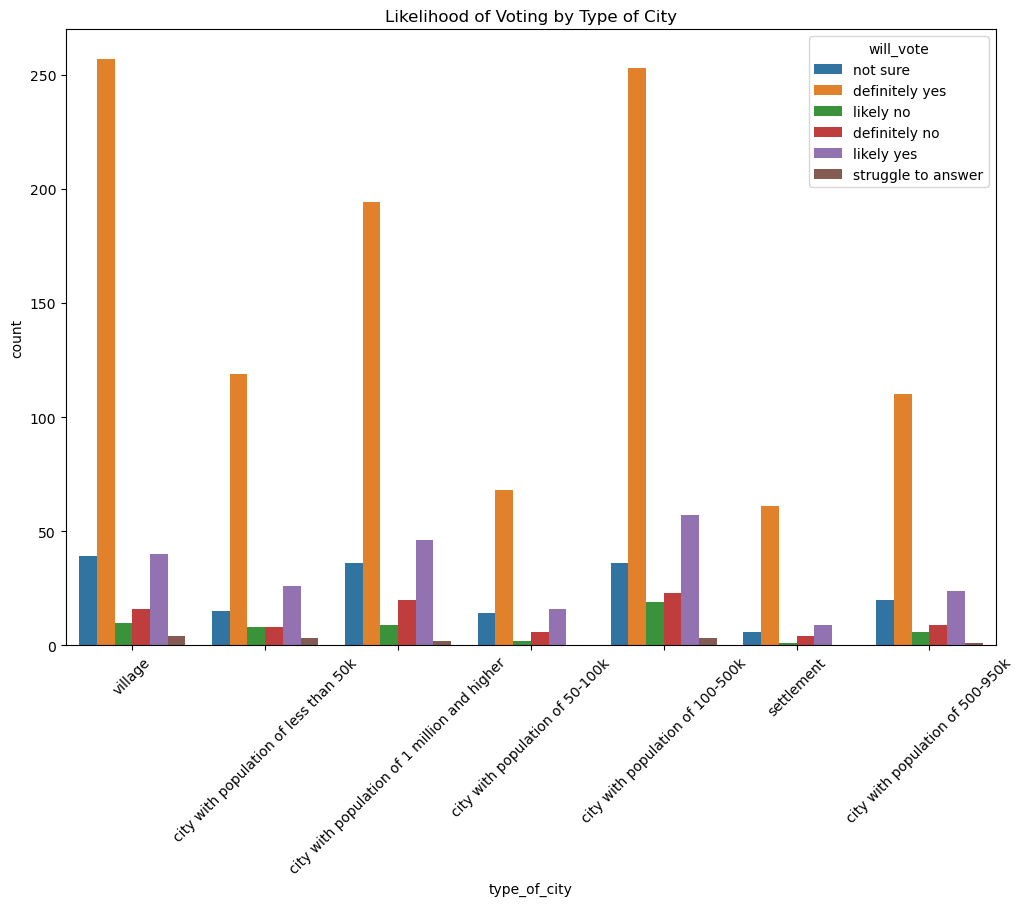

In [176]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='type_of_city', hue='will_vote')
plt.title('Likelihood of Voting by Type of City')
plt.xticks(rotation=45)
plt.show()

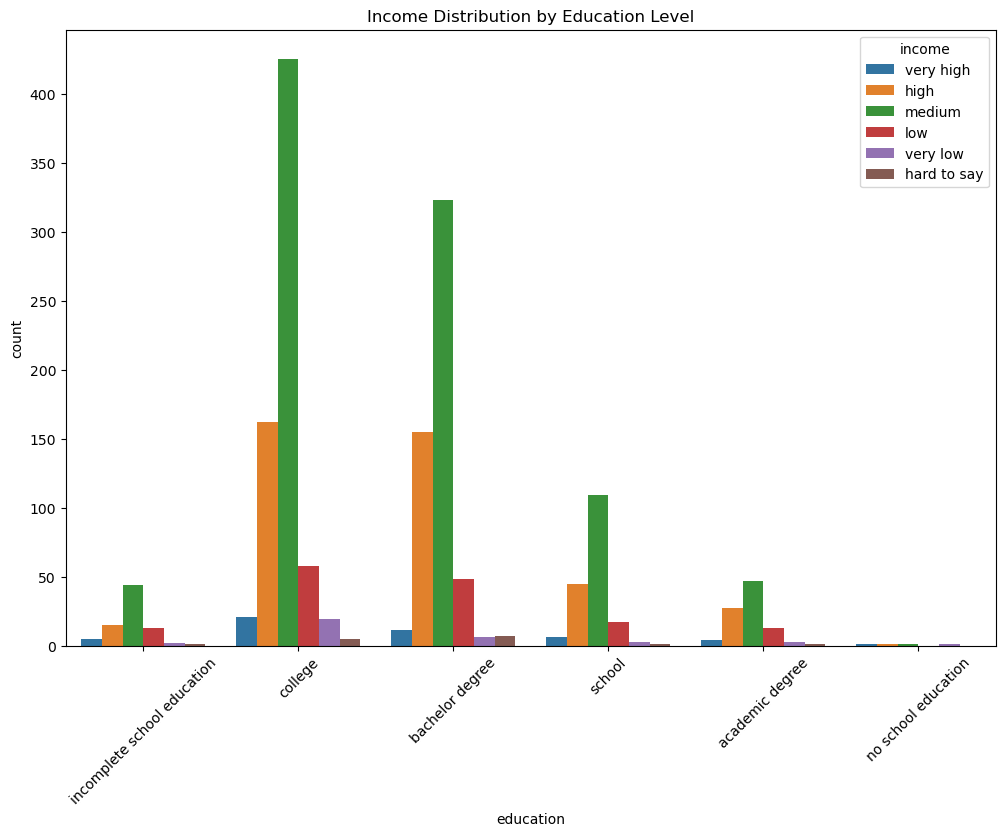

In [177]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='education', hue='income')
plt.title('Income Distribution by Education Level')
plt.xticks(rotation=45)
plt.show()

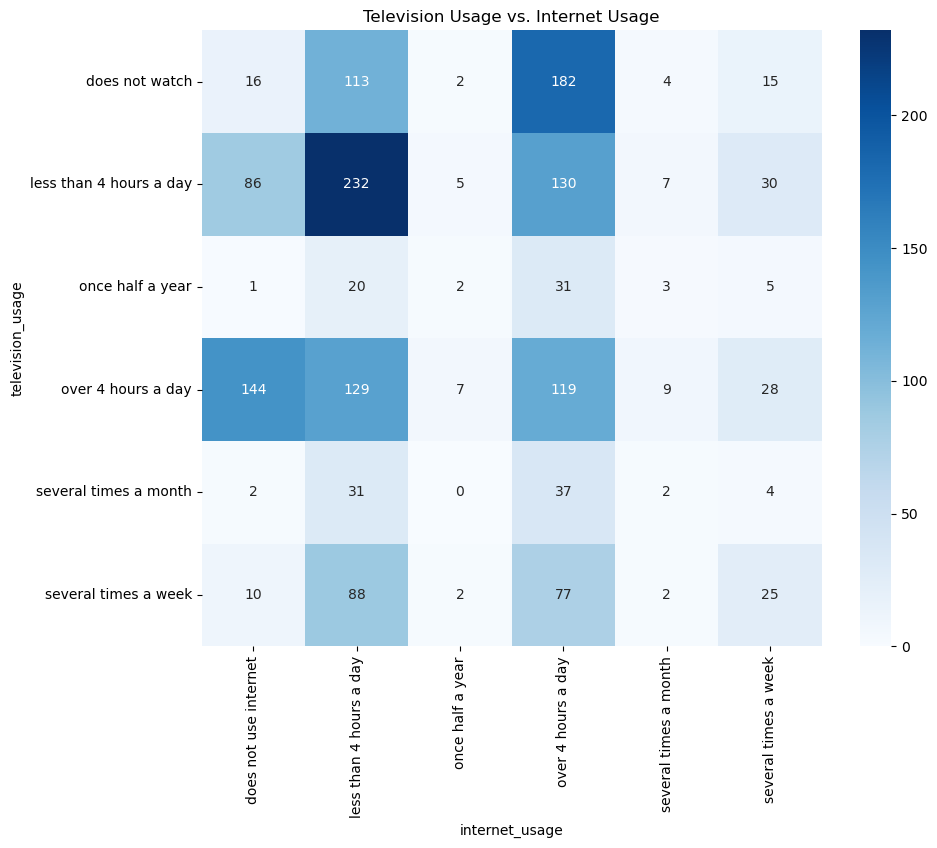

In [178]:
usage_crosstab = pd.crosstab(df['television_usage'], df['internet_usage'])
plt.figure(figsize=(10, 8))
sns.heatmap(usage_crosstab, annot=True, cmap='Blues', fmt='d')
plt.title('Television Usage vs. Internet Usage')
plt.show()

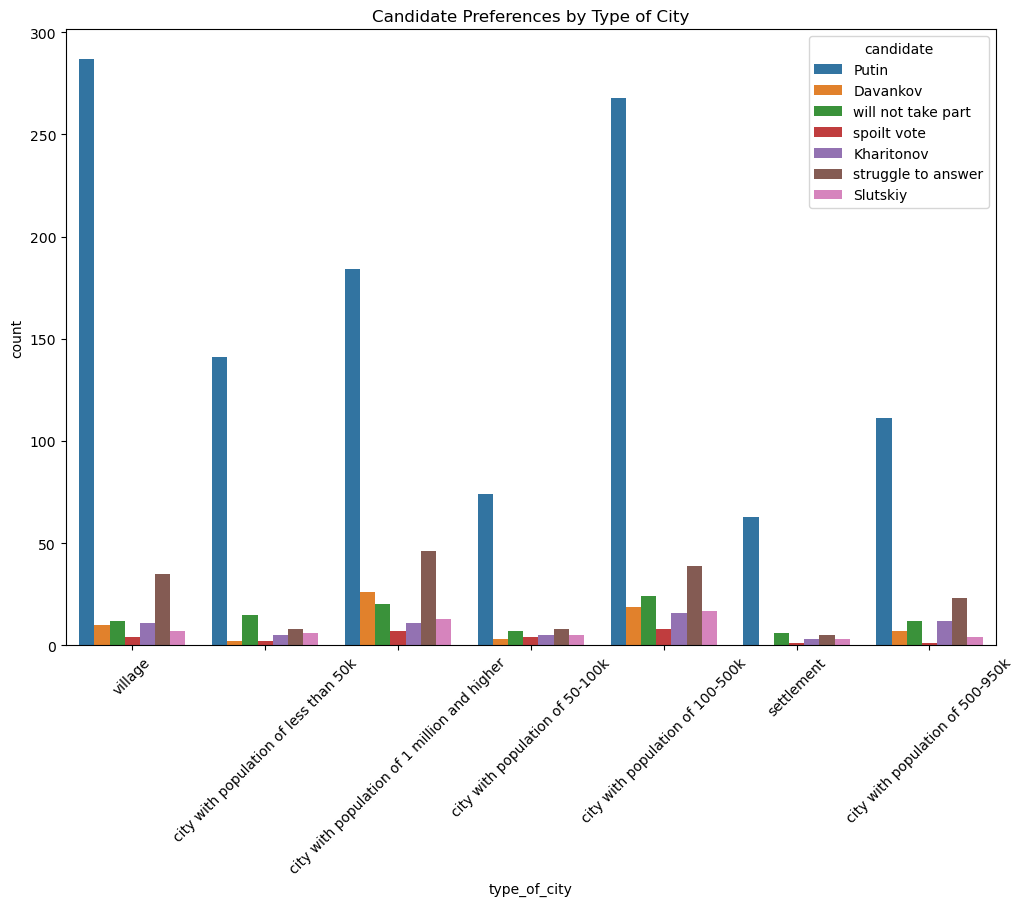

In [179]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='type_of_city', hue='candidate')
plt.title('Candidate Preferences by Type of City')
plt.xticks(rotation=45)
plt.show()

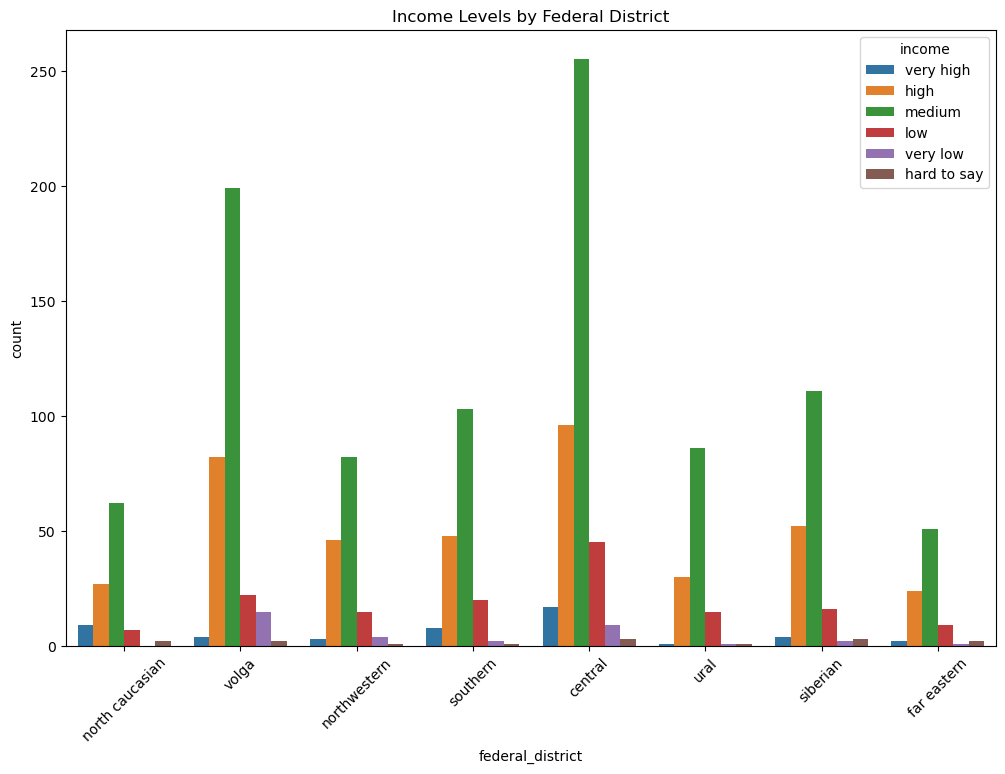

In [181]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='federal_district', hue='income')
plt.title('Income Levels by Federal District')
plt.xticks(rotation=45)
plt.show()

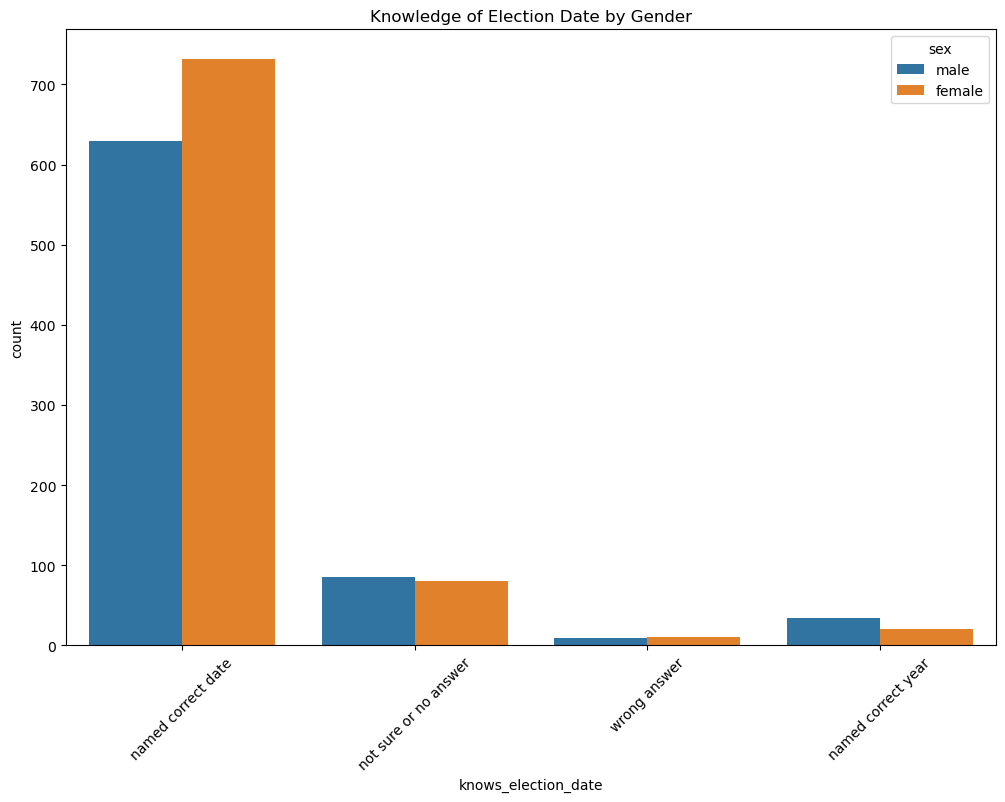

In [183]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='knows_election_date', hue='sex')
plt.title('Knowledge of Election Date by Gender')
plt.xticks(rotation=45)
plt.show()

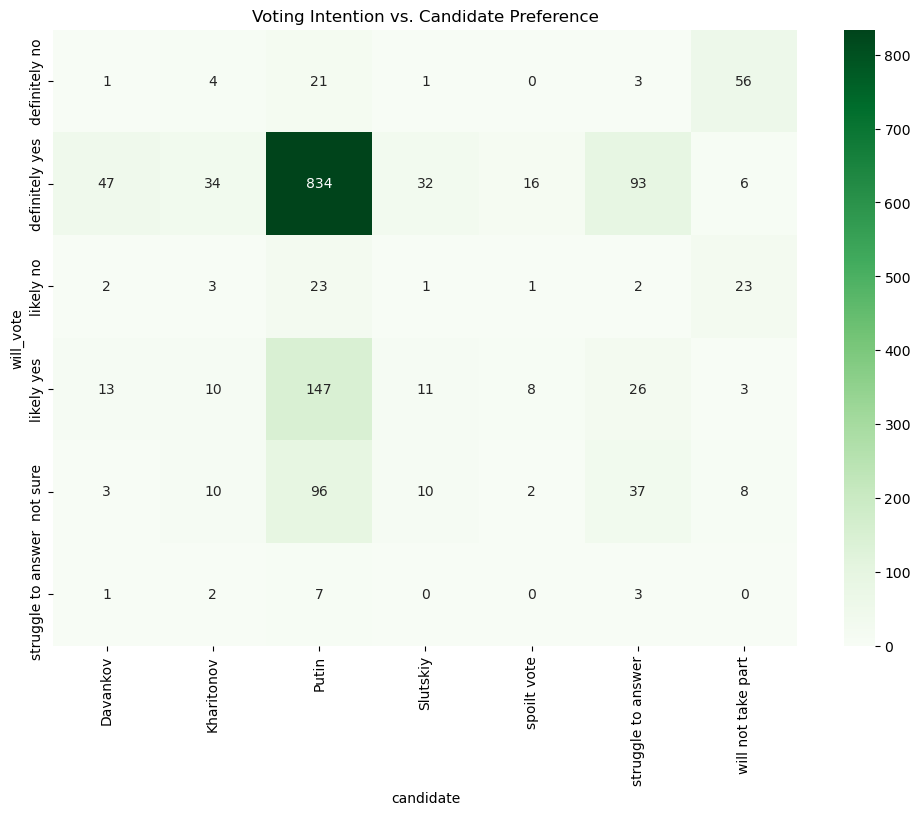

In [184]:
vote_candidate_crosstab = pd.crosstab(df['will_vote'], df['candidate'])
plt.figure(figsize=(12, 8))
sns.heatmap(vote_candidate_crosstab, annot=True, cmap='Greens', fmt='d')
plt.title('Voting Intention vs. Candidate Preference')
plt.show()